## Exercise 7.1
- Load the image and detect edges in it. Here the function cv2.Canny can be used. Visualize the edges you have detected.

In [2]:
import cv2 
path = "week06_data/Box3.bmp"
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

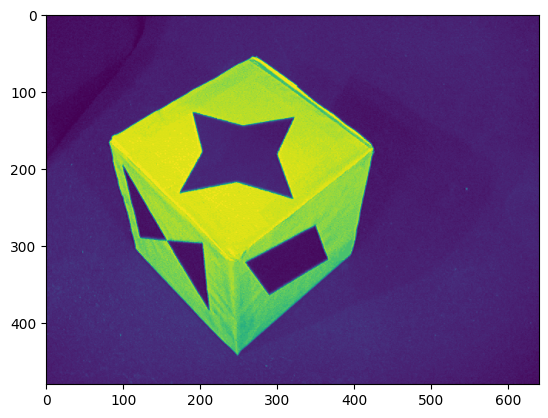

In [3]:
import matplotlib.pyplot as plt 

plt.imshow(img)



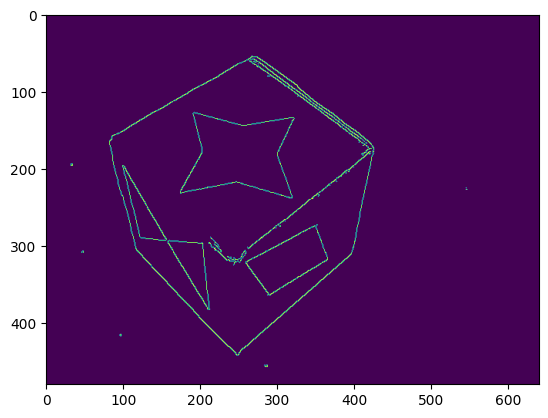

In [4]:
edges = cv2.Canny(img,50,200)
plt.imshow(edges)

## Exercise 7.2
####  Compute the Hough space from the detected edges. Use the function
### hspace, angles, dists = skimage.transform.hough_line(edges)
### What do the returned values hspace, angles, dists mean?

In [34]:
import skimage 


hspace, angles, dists = skimage.transform.hough_line(edges)

## Exercise 7.3
### Visualize the Hough space. To get the correct units on the axes you can use extent = [angles[0], angles[-1], dists[-1], dists[0]]
### plt.imshow(hspace, extent=extent, aspect='auto')

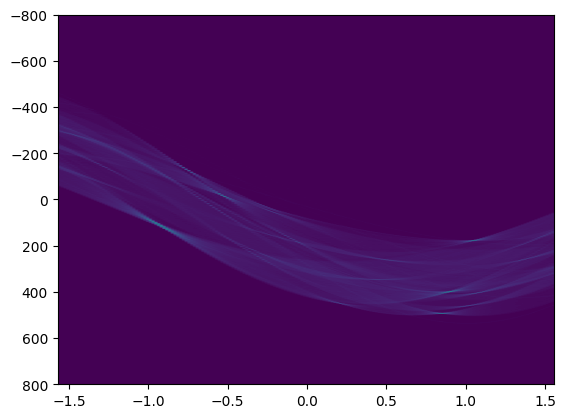

In [6]:
extent = [angles[0], angles[-1], dists[-1], dists[0]] 

plt.imshow(hspace,extent=extent,aspect="auto")

# Exercise 7.4

####  Find peaks in your Hough space, using skimage.transform.hough_line_peaks. extH, extAngles, extDists = hough_line_peaks(hspace, angles, dists, num_peaks=n)
#### Display your identified peaks on top of the Hough space.

In [35]:
n= 5
extH, extAngles, extDists =  skimage.transform.hough_line_peaks(hspace, angles, dists, num_peaks=n)

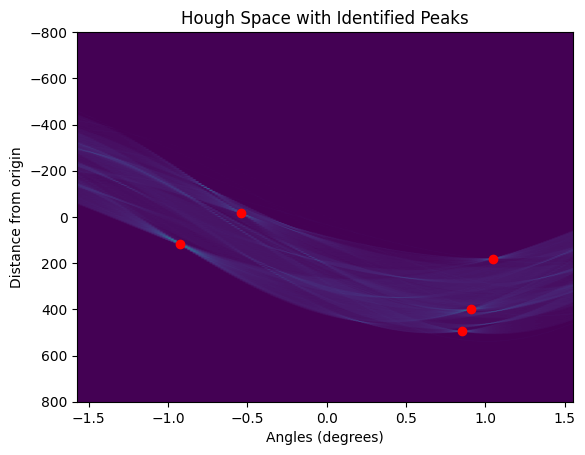

In [36]:
import numpy as np 

extH, extAngles, extDists =  skimage.transform.hough_line_peaks(hspace, angles, dists, num_peaks=n)

plt.imshow(hspace, extent=extent, aspect='auto')
plt.scatter((extAngles), extDists, color='red')
plt.title('Hough Space with Identified Peaks')
plt.xlabel('Angles (degrees)')
plt.ylabel('Distance from origin')
plt.show()

## 7.5 



In [9]:
def DrawLine(l, shape):
    #Checks where the line intersects the four sides of the image
    # and finds the two intersections that are within the frame
    def in_frame(l_im): 
        q = np.cross(l.flatten(), l_im)
        q = q[:2]/q[2]
        if all(q>=0) and all(q+1<=shape[1::-1]):
          return q
    lines = [[1, 0, 0], [0, 1, 0], [1, 0, 1-shape[1]], [0, 1, 1-shape[0]]]
    P = [in_frame(l_im) for l_im in lines if in_frame(l_im) is not None]
    if (len(P)==0):
        print("Line is completely outside image")
    plt.plot(*np.array(P).T)




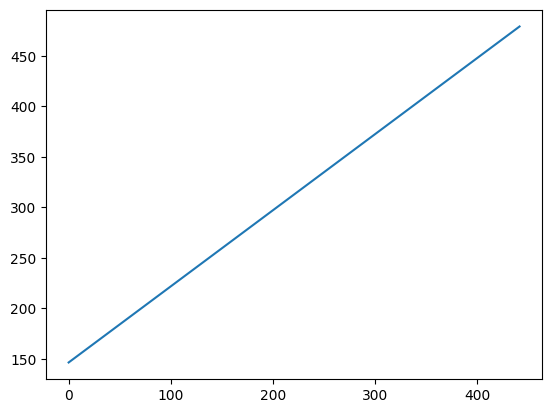

In [37]:
lines = [[np.cos(theta),np.sin(theta),r] for theta,r in zip(extAngles,extDists)]

DrawLine(np.array(lines[4]),img.shape)



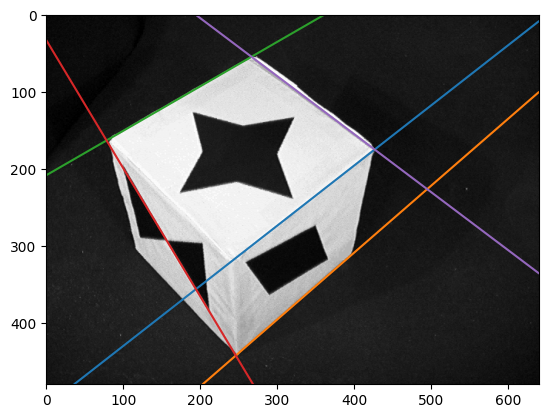

In [11]:
for theta, r in zip(extAngles, extDists):
    # Convert polar coordinates to two points on the line
    x1 = 0
    y1 = (r - x1 * np.cos(theta)) / np.sin(theta)
    x2 = img.shape[1]
    y2 = (r - x2 * np.cos(theta)) / np.sin(theta)
    
    line = np.cross([x1, y1, 1], [x2, y2, 1])
    
    # Draw the line
    DrawLine(line, img.shape)
    
plt.imshow(img, cmap='gray')
plt.show()

## Make a function that fits a line, in homogeneous coordinates, given two points.

In [38]:

def test_points(n_in, n_out):

    a = (np.random.rand(n_in)-.5)*10
    b = np.vstack((a, a*.5+np.random.randn(n_in)*.25))
    points = np.hstack((b, 2*np.random.randn(2, n_out)))
    return np.random.permutation(points.T).T


def fit_a_line(p1,p2):

    
    l = np.cross(PiInv(p1),PiInv(p2)) 
    return l



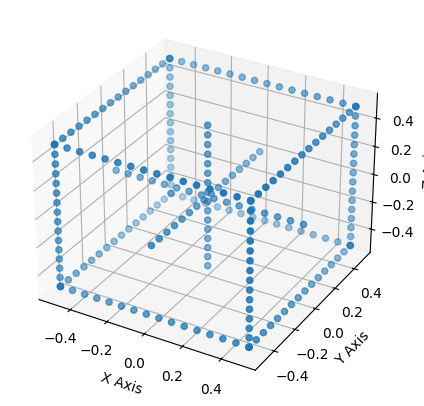

In [13]:
from week1 import * 

## Exercise 7.7
####  Make a function that determines which of a set of 2D points are an inliers or outliers with respect to a given line. The threshold should be supplied as parameter to this function, such that it can easily be tuned later

In [39]:

def detect_inlier(l,thresh,points):

    inliers = []

    for point in points.T:

        dist = np.dot(l, PiInv(point))
        
        if dist<thresh:
            inliers.append(point)

    return inliers 


## Exercise 7.8
####  Make a function that calculates the consensus, i.e. the number of inliers, for a line with respect to a set of points

In [40]:
def calculate_consensus(points,l,thresh):
    inliers = detect_inlier(l,thresh,points)

    return len(inliers)


## Exercise 7.9
### Make a function that randomly samples two of n 2D points (without replacement).

In [41]:
import numpy as np

def sample_two_points(points):
    """
    Randomly samples two points from a given array of 2D points without replacement.

    Parameters:
    - points: A numpy array of shape (n, 2), where n is the number of points, and each point is [x, y].

    Returns:
    - A numpy array of shape (2, 2), representing two randomly sampled 2D points without replacement.
    """
    # Ensure there are enough points to sample from
    if len(points) < 2:
        raise ValueError("The input array must contain at least two points.")
    
    # Randomly choose two indices without replacement
    indices = np.random.choice(len(points), size=2, replace=False)
    
    # Return the two randomly sampled points
    return points[indices]





## Exercise 7.10
#### Assemble the functions made above to a working RANSAC algorithm for estimating lines. Set the number of iterations and the threshold manually.

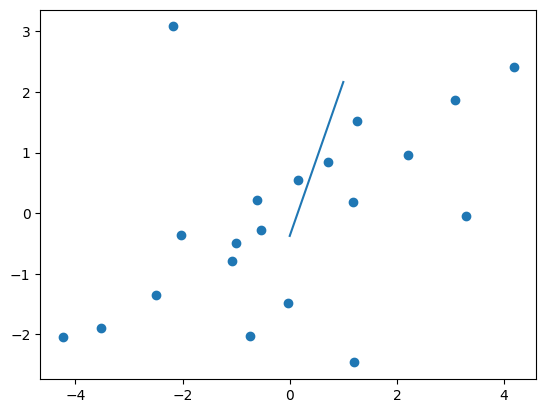

In [131]:
def RANSAC(points,threshold,N):


    best_line = None 
    best_cons = 0

    for _ in range(N):


        # Random sample 
        S = sample_two_points(points.T) 

        # Estimate model 
        l = fit_a_line(S.T[0],S.T[1])

        # Consensus 
        cons = calculate_consensus(points,l,thresh=threshold)
        
    

        if cons>best_cons:
            best_line = l 
        

    return best_line

    

test = test_points(10,10)

best_line = RANSAC(test,0.91,25)


plt.scatter(test[0],test[1])
plt.plot(Pi(best_line))

In [75]:
Pi(best_line)


array([ 0.36168063, -2.1921032 ])

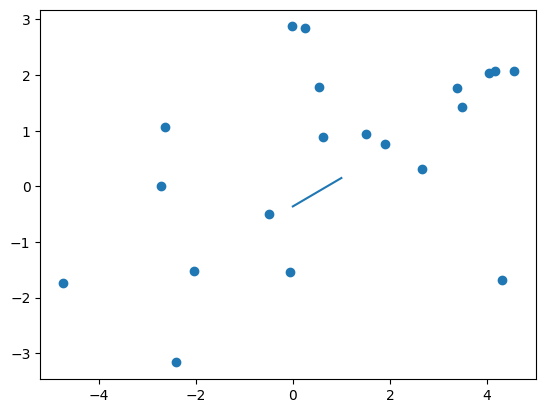

In [126]:
best_line = RANSAC(points,0.1,205)


plt.scatter(points[0].T,points[1].T)
plt.plot(Pi(best_line))

### Exercise 7.11
##### Experiment with the algorithm, what is a good threshold for distinguishing between inliers and outliers?

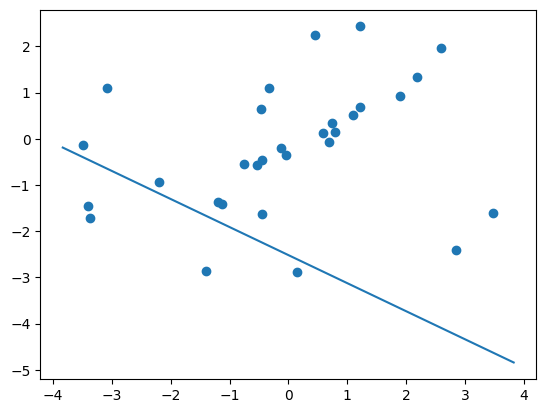

In [188]:
import numpy as np
import matplotlib.pyplot as plt

# Sample points here (using your own sampling method)
test_p = test_points(10,20)
points = sample_two_points(test_p)

# Calculate coefficients of the line
# For line Ax + By + C = 0, using two points (x1, y1) and (x2, y2):
A = points[1][1] - points[0][1]  # y2 - y1
B = points[0][0] - points[1][0]  # x1 - x2
C = points[1][0]*points[0][1] - points[0][0]*points[1][1]  # x2*y1 - x1*y2

# Plot points
plt.scatter(test_p[0], test_p[1], label='All Points')
# Plot line
x_vals = np.array(plt.gca().get_xlim())
y_vals = -(C + A * x_vals) / B
plt.plot(x_vals, y_vals)

plt.show()


In [170]:
test_p.T[:,0]

array([-1.77746659, -0.13693216,  1.22247233,  3.1027315 ,  0.72881352,
       -1.48459689, -5.71216144,  0.6012492 ,  4.33190964,  3.63514763,
       -2.71442337, -0.59171108,  1.08950864,  2.20073036, -1.81825894,
        0.80488025, -1.04926188,  4.20672096,  3.3421042 , -2.22779159,
        0.04348172, -0.60813844,  3.32340955,  2.38048969, -1.05218194,
       -1.7010805 , -0.75241464,  0.15720013,  2.62034953,  3.2274809 ])

## Exercise 7.12 

In [152]:
def fit_a_line(p1,p2):

    
    l = np.cross(PiInv(p1),PiInv(p2)) 
    return l

points = sample_two_points(test.T)
l = fit_a_line(points[0],points[1])
plt.scatter(points[0],points[1])
plt.plot(Pi(l))

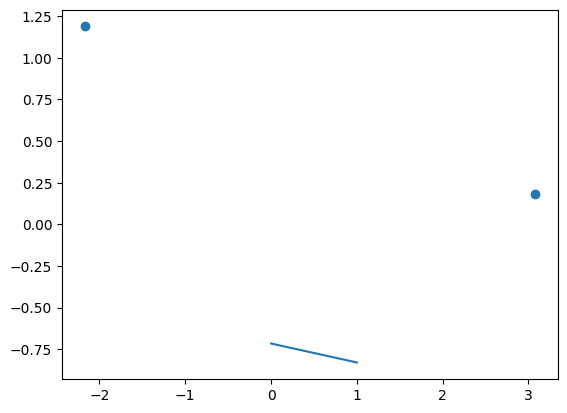

In [153]:
plt.scatter(points[0],points[1])
plt.plot(Pi(l))

In [143]:
def fit_a_line(p1,p2):

    
    l = np.cross(PiInv(p1),PiInv(p2)) 
    return l